WIA1006 Group Assignment


> Groupmates: Vanessa, Boon Ping, Khai Hon, Jieru, Chuan Lin

> Title: 3 Highs and CHD Prediction with Meal Recommendation System





### Data Preprocessing

In [1]:
# Supress warning

import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.DataFrame(pd.read_csv('D:/UM AI/Y1S2/WIA1006 Machine Learning/Group Assignment - 3HighsPrediction\WIA1006 Group Assignment/Dataset.csv'))

**Preview data**

In [4]:
data.head()

male  age  education  currentSmoker  cigsPerDay  exerciseMinPerWeek  \
0     1   39        4.0              0         0.0                 101   
1     0   46        2.0              0         0.0                  47   
2     1   48        1.0              1        20.0                  26   
3     0   61        3.0              1        30.0                  23   
4     0   46        3.0              1        23.0                   6   

   vegetarian  BPMeds  prevalentStroke  prevalentHyp  ...  diabetesFH  \
0           1     0.0                0             0  ...           0   
1           0     0.0                0             0  ...           0   
2           0     0.0                0             0  ...           0   
3           0     0.0                0             1  ...           0   
4           0     0.0                0             0  ...           0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose (mg/dL)  HighBP  \
0    195.0  106.0   70.0  26.97       80.0             77.0       0   
1    250.0  121.0   81.0  28.73       95.0             76.0       0   
2    245.0  127.5   80.0  25.34       75.0             70.0       0   
3    225.0  150.0   95.0  28.58       65.0            103.0       1   
4    285.0  130.0   84.0  23.10       85.0             85.0       0   

   Hypercholesterolemia  diabetes  
0                     0         0  
1                     1         0  
2                     1         0  
3                     0         0  
4                     1         0  

[5 rows x 22 columns]

**Data inspection**

In [5]:
data.shape

(4240, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   male                  4240 non-null   int64  
 1   age                   4240 non-null   int64  
 2   education             4135 non-null   float64
 3   currentSmoker         4240 non-null   int64  
 4   cigsPerDay            4211 non-null   float64
 5   exerciseMinPerWeek    4240 non-null   int64  
 6   vegetarian            4240 non-null   int64  
 7   BPMeds                4187 non-null   float64
 8   prevalentStroke       4240 non-null   int64  
 9   prevalentHyp          4240 non-null   int64  
 10  highBPFH              4240 non-null   int64  
 11  hyperchoFH            4240 non-null   int64  
 12  diabetesFH            4240 non-null   int64  
 13  totChol               4190 non-null   float64
 14  sysBP                 4240 non-null   float64
 15  diaBP                

In [7]:
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

       exerciseMinPerWeek   vegetarian       BPMeds  prevalentStroke  \
count         4240.000000  4240.000000  4187.000000      4240.000000   
mean            46.468632     0.289858     0.029615         0.005896   
std             33.178138     0.453750     0.169544         0.076569   
min              0.000000     0.000000     0.000000         0.000000   
25%             19.000000     0.000000     0.000000         0.000000   
50%             39.000000     0.000000     0.000000         0.000000   
75%             75.000000     1.000000     0.000000         0.000000   
max            115.000000     1.000000     1.000000         1.000000   

       prevalentHyp  ...   diabetesFH      totChol        sysBP        diaBP  \
count   4240.000000  ...  4240.000000  4190.000000  4240.000000  4240.000000   
mean       0.310613  ...     0.026415   236.699523   132.354599    82.897759   
std        0.462799  ...     0.160385    44.591284    22.033300    11.910394   
min        0.000000  ...     0.000000   107.000000    83.500000    48.000000   
25%        0.000000  ...     0.000000   206.000000   117.000000    75.000000   
50%        0.000000  ...     0.000000   234.000000   128.000000    82.000000   
75%        1.000000  ...     0.000000   263.000000   144.000000    90.000000   
max        1.000000  ...     1.000000   696.000000   295.000000   142.500000   

               BMI    heartRate  glucose (mg/dL)       HighBP  \
count  4221.000000  4239.000000      3852.000000  4240.000000   
mean     25.800801    75.878981        81.963655     0.464151   
std       4.079840    12.025348        23.954335     0.498772   
min      15.540000    44.000000        40.000000     0.000000   
25%      23.070000    68.000000        71.000000     0.000000   
50%      25.400000    75.000000        78.000000     0.000000   
75%      28.040000    83.000000        87.000000     1.000000   
max      56.800000   143.000000       394.000000     1.000000   

       Hypercholesterolemia     diabetes  
count           4240.000000  4240.000000  
mean               0.435377     0.025708  
std                0.495865     0.158280  
min                0.000000     0.000000  
25%                0.000000     0.000000  
50%                0.000000     0.000000  
75%                1.000000     0.000000  
max                1.000000     1.000000  

[8 rows x 22 columns]

Use isna() function to **check missing values**

In [8]:
data.isna().sum()

male                      0
age                       0
education               105
currentSmoker             0
cigsPerDay               29
exerciseMinPerWeek        0
vegetarian                0
BPMeds                   53
prevalentStroke           0
prevalentHyp              0
highBPFH                  0
hyperchoFH                0
diabetesFH                0
totChol                  50
sysBP                     0
diaBP                     0
BMI                      19
heartRate                 1
glucose (mg/dL)         388
HighBP                    0
Hypercholesterolemia      0
diabetes                  0
dtype: int64

In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True)

male  age  education  currentSmoker  cigsPerDay  exerciseMinPerWeek  \
0        1   39        4.0              0         0.0                 101   
1        0   46        2.0              0         0.0                  47   
2        1   48        1.0              1        20.0                  26   
3        0   61        3.0              1        30.0                  23   
4        0   46        3.0              1        23.0                   6   
...    ...  ...        ...            ...         ...                 ...   
3653     1   50        1.0              1         1.0                  44   
3654     1   51        3.0              1        43.0                 107   
3655     0   52        2.0              0         0.0                  41   
3656     1   40        3.0              0         0.0                   2   
3657     0   39        3.0              1        30.0                  11   

      vegetarian  BPMeds  prevalentStroke  prevalentHyp  ...  diabetesFH  \
0              1     0.0                0             0  ...           0   
1              0     0.0                0             0  ...           0   
2              0     0.0                0             0  ...           0   
3              0     0.0                0             1  ...           0   
4              0     0.0                0             0  ...           0   
...          ...     ...              ...           ...  ...         ...   
3653           0     0.0                0             1  ...           0   
3654           1     0.0                0             0  ...           0   
3655           0     0.0                0             0  ...           1   
3656           0     0.0                0             1  ...           0   
3657           0     0.0                0             0  ...           0   

      totChol  sysBP  diaBP    BMI  heartRate  glucose (mg/dL)  HighBP  \
0       195.0  106.0   70.0  26.97       80.0             77.0       0   
1       250.0  121.0   81.0  28.73       95.0             76.0       0   
2       245.0  127.5   80.0  25.34       75.0             70.0       0   
3       225.0  150.0   95.0  28.58       65.0            103.0       1   
4       285.0  130.0   84.0  23.10       85.0             85.0       0   
...       ...    ...    ...    ...        ...              ...     ...   
3653    313.0  179.0   92.0  25.97       66.0             86.0       1   
3654    207.0  126.5   80.0  19.71       65.0             68.0       0   
3655    269.0  133.5   83.0  21.47       80.0            107.0       1   
3656    185.0  141.0   98.0  25.60       67.0             72.0       1   
3657    196.0  133.0   86.0  20.91       85.0             80.0       1   

      Hypercholesterolemia  diabetes  
0                        0         0  
1                        1         0  
2                        1         0  
3                        0         0  
4                        1         0  
...                    ...       ...  
3653                     1         0  
3654                     0         0  
3655                     1         0  
3656                     0         0  
3657                     0         0  

[3658 rows x 22 columns]

In [10]:
data.isna().sum()

male                    0
age                     0
education               0
currentSmoker           0
cigsPerDay              0
exerciseMinPerWeek      0
vegetarian              0
BPMeds                  0
prevalentStroke         0
prevalentHyp            0
highBPFH                0
hyperchoFH              0
diabetesFH              0
totChol                 0
sysBP                   0
diaBP                   0
BMI                     0
heartRate               0
glucose (mg/dL)         0
HighBP                  0
Hypercholesterolemia    0
diabetes                0
dtype: int64

In [11]:
data.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  exerciseMinPerWeek  \
0        1   39        4.0              0         0.0                 101   
1        0   46        2.0              0         0.0                  47   
2        1   48        1.0              1        20.0                  26   
3        0   61        3.0              1        30.0                  23   
4        0   46        3.0              1        23.0                   6   
...    ...  ...        ...            ...         ...                 ...   
4233     1   50        1.0              1         1.0                  44   
4234     1   51        3.0              1        43.0                 107   
4237     0   52        2.0              0         0.0                  41   
4238     1   40        3.0              0         0.0                   2   
4239     0   39        3.0              1        30.0                  11   

      vegetarian  BPMeds  prevalentStroke  

**Outlier analysis (for qualitative analysis)**

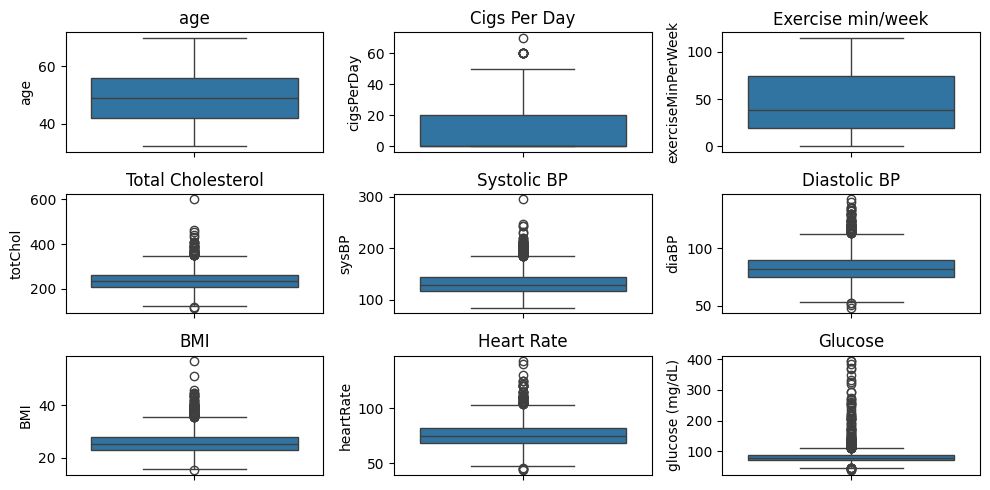

In [12]:
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(title="age")
plt2 = sns.boxplot(data['cigsPerDay'], ax = axs[0,1]).set(title="Cigs Per Day")
plt3 = sns.boxplot(data['exerciseMinPerWeek'], ax = axs[0,2]).set(title="Exercise min/week")
plt1 = sns.boxplot(data['totChol'], ax = axs[1,0]).set(title="Total Cholesterol")
plt2 = sns.boxplot(data['sysBP'], ax = axs[1,1]).set(title="Systolic BP")
plt3 = sns.boxplot(data['diaBP'], ax = axs[1,2]).set(title="Diastolic BP")
plt1 = sns.boxplot(data['BMI'], ax = axs[2,0]).set(title="BMI")
plt2 = sns.boxplot(data['heartRate'], ax = axs[2,1]).set(title="Heart Rate")
plt3 = sns.boxplot(data['glucose (mg/dL)'], ax = axs[2,2]).set(title="Glucose")
plt.tight_layout()

Outliers exist in total cholesterol, systolic BP, diastolc BP, BMI, heart rate and glucose features. However, upon research, the max values of the features are identified logical and therefore not removed to maintain data size and avoid fallacy in the prediction model.

**Visualization of numerical features**

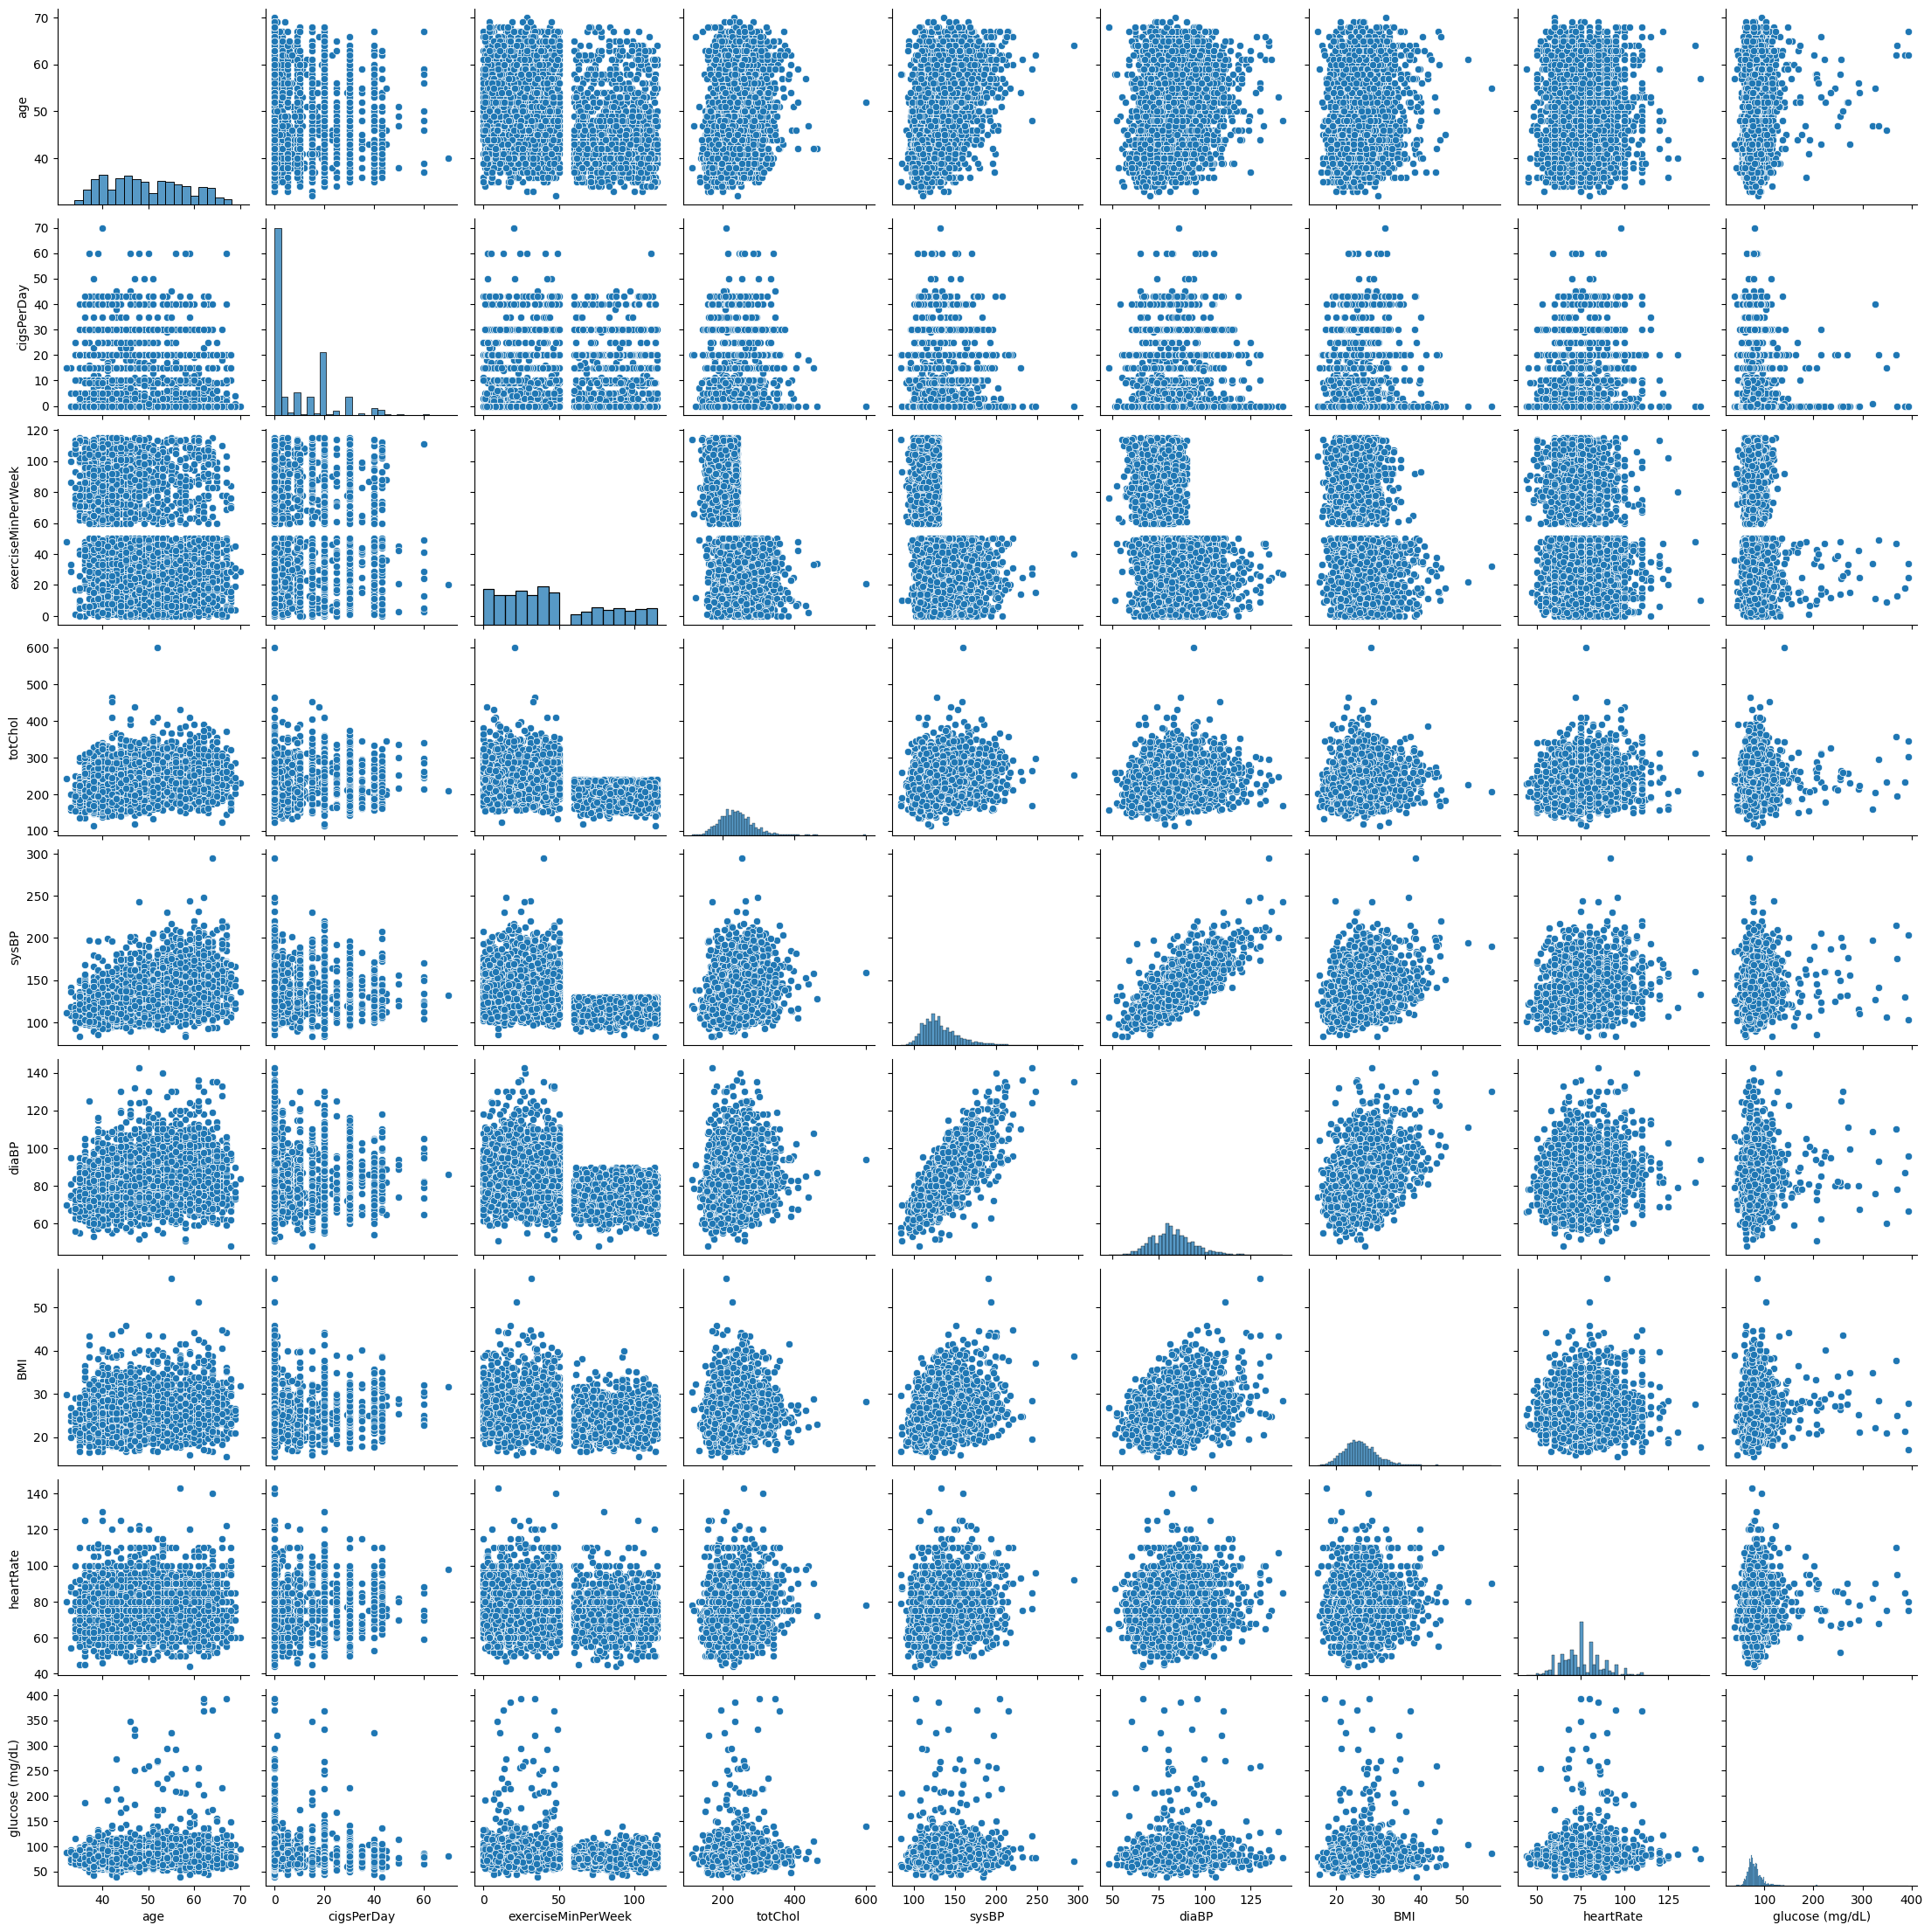

In [13]:
numerical_data = data.iloc[:,[1,4,5,13,14,15,16,17,18]]
sns.pairplot(numerical_data)
plt.show()

**Separate the features and targets**

In [14]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'exerciseMinPerWeek', 'vegetarian', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'highBPFH', 'hyperchoFH', 'diabetesFH', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose (mg/dL)', 'HighBP',
       'Hypercholesterolemia', 'diabetes'],
      dtype='object')

In [15]:
X = data.iloc[:, :-3].values
y = data.iloc[:, -3:].values

print(X.shape)
print(y.shape)

(3658, 19)
(3658, 3)


**Imbalanced data handling**

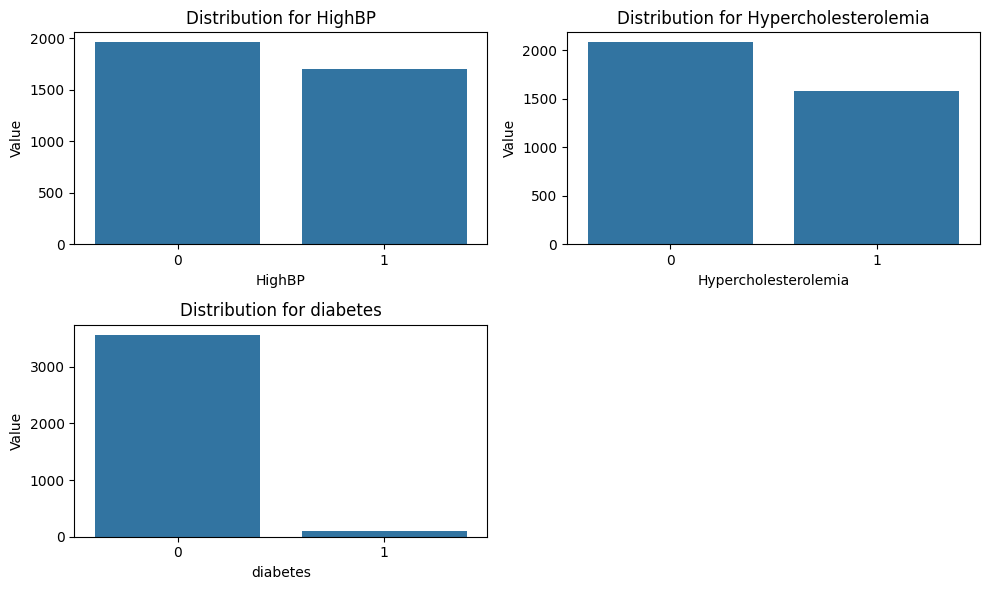

In [16]:
# Examine distribution of positive and negative cases
import seaborn as sns
feature_list = ['HighBP','Hypercholesterolemia','diabetes']
def distribution_analysis(features, data):
    """
    Perform distribution analysis for target variables using bar chart.

    Args:
        features (list): List of feature names.
        data (pandas DataFrame): Dataset containing the features.

    Returns:
        None
    """

    num_plots = len(features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
    fig.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(features):
        ax = axes[i // num_cols, i % num_cols]
        sns.countplot(data=data, x=feature, ax=ax)
        ax.set_title(f'Distribution for {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Value')

    # Remove empty subplots if the number of features is not a multiple of num_cols
    if num_plots % num_cols != 0:
        for j in range(num_plots % num_cols, num_cols):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

distribution_analysis(feature_list, data)

The data for diabetes is too little

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_temp = data.iloc[:,:-1]
y_temp = data.iloc[:,-1:]
X_temp, y_temp = smote.fit_resample(X_temp, y_temp)
print(X_temp.shape)
print (y_temp.shape)
data = pd.concat([X_temp, y_temp], axis=1)

(7118, 21)
(7118, 1)


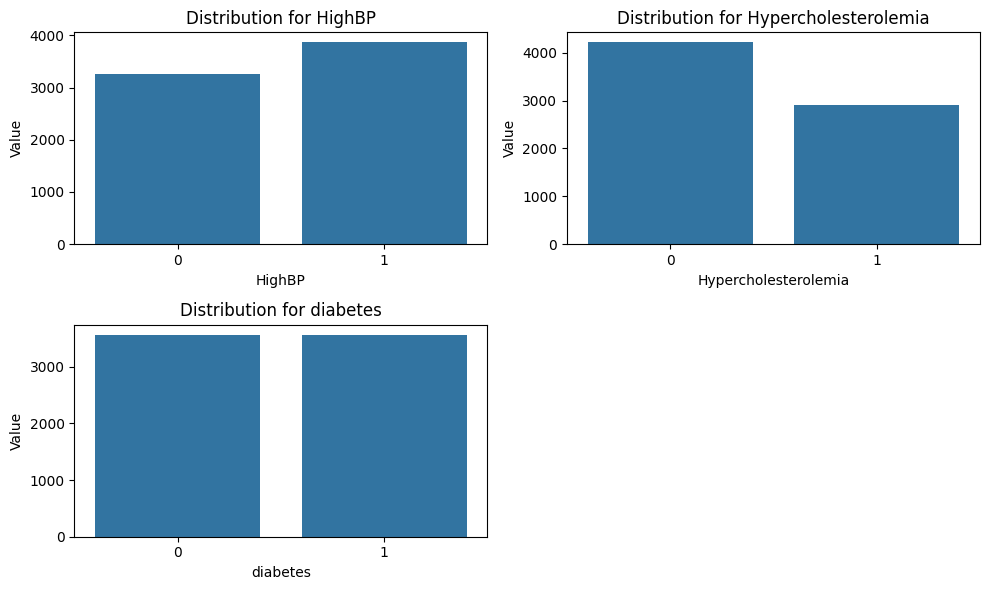

In [19]:
distribution_analysis(feature_list, data)

**Split the dataset into training and testing sets**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2340, 19)
(586, 19)
(732, 19)


**Check correlation with heatmap**

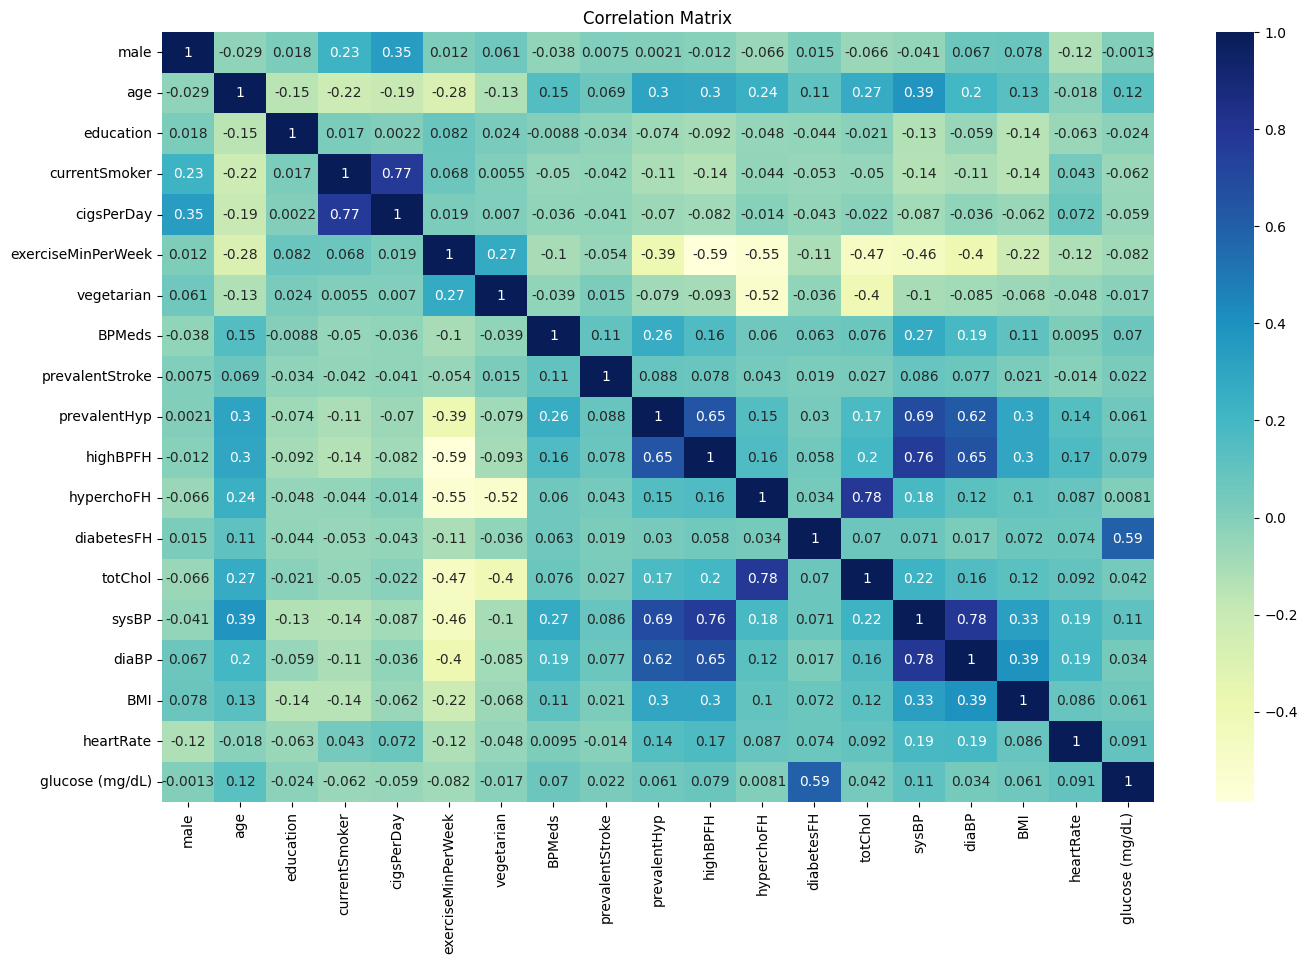

In [21]:
feature_names =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'exerciseMinPerWeek', 'vegetarian', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'highBPFH', 'hyperchoFH', 'diabetesFH', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose (mg/dL)']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
corr = X_train_df.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

# Model development

**Random Forest**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_pipeline_RF = make_pipeline(StandardScaler(), MultiOutputClassifier(RandomForestClassifier()))

# Train the model
model_pipeline_RF.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model_pipeline_RF.predict(X_val)

# Evaluate the model performance on the validation set
target_names = ['HighBP', 'Hypercholesterolemia', 'diabetes']
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Predict on the test set
y_test_pred = model_pipeline_RF.predict(X_test)

# Evaluate the model performance on the test set
print("Test set - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Validation Set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       271
Hypercholesterolemia       1.00      1.00      1.00       261
            diabetes       1.00      1.00      1.00        16

           micro avg       1.00      1.00      1.00       548
           macro avg       1.00      1.00      1.00       548
        weighted avg       1.00      1.00      1.00       548
         samples avg       0.66      0.66      0.66       548

Test set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       327
Hypercholesterolemia       1.00      1.00      1.00       308
            diabetes       0.91      0.95      0.93        22

           micro avg       1.00      1.00      1.00       657
           macro avg       0.97      0.98      0.98       657
        weighted avg       1.00      1.00      1.00  

**SVM**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_pipeline_SVM = make_pipeline(StandardScaler(), MultiOutputClassifier(SVC()))

# Train the model
model_pipeline_SVM.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model_pipeline_SVM.predict(X_val)

# Evaluate the model performance on the validation set
target_names = ['HighBP', 'Hypercholesterolemia', 'diabetes']
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Predict on the test set
y_test_pred = model_pipeline_SVM.predict(X_test)

# Evaluate the model performance on the test set
print("Test set - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Validation Set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       0.99      1.00      1.00       271
Hypercholesterolemia       1.00      1.00      1.00       261
            diabetes       1.00      1.00      1.00        16

           micro avg       0.99      1.00      1.00       548
           macro avg       1.00      1.00      1.00       548
        weighted avg       0.99      1.00      1.00       548
         samples avg       0.66      0.66      0.66       548

Test set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       327
Hypercholesterolemia       1.00      0.99      1.00       308
            diabetes       0.91      0.95      0.93        22

           micro avg       1.00      1.00      1.00       657
           macro avg       0.97      0.98      0.98       657
        weighted avg       1.00      1.00      1.00  

**Hist Gradient Boosting**

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

model_pipeline_HGB = make_pipeline(StandardScaler(), MultiOutputClassifier(HistGradientBoostingClassifier()))

# Train the model
model_pipeline_HGB.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model_pipeline_HGB.predict(X_val)

# Evaluate the model performance on the validation set
target_names = ['HighBP', 'Hypercholesterolemia', 'diabetes']
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Predict on the test set
y_test_pred = model_pipeline_HGB.predict(X_test)

# Evaluate the model performance on the test set
print("Test set - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Validation Set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       271
Hypercholesterolemia       1.00      1.00      1.00       261
            diabetes       1.00      0.75      0.86        16

           micro avg       1.00      0.99      1.00       548
           macro avg       1.00      0.92      0.95       548
        weighted avg       1.00      0.99      1.00       548
         samples avg       0.66      0.66      0.66       548

Test set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       327
Hypercholesterolemia       1.00      1.00      1.00       308
            diabetes       0.95      0.91      0.93        22

           micro avg       1.00      1.00      1.00       657
           macro avg       0.98      0.97      0.98       657
        weighted avg       1.00      1.00      1.00  

# Model refinement

The three models are performing well. Random Forest model has been chosen to be fine-tuned since it is performing the best out of the three. 

**Hypermeter tuning**

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'multioutputclassifier__estimator__n_estimators': randint(100, 1000),
    'multioutputclassifier__estimator__max_depth': randint(5, 50),
    'multioutputclassifier__estimator__min_samples_split': randint(2, 20),
    'multioutputclassifier__estimator__min_samples_leaf': randint(1, 10),
    'multioutputclassifier__estimator__max_features': ['auto', 'sqrt'],
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(
    estimator=model_pipeline_RF,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2,
)

# Fit the random search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Predict on the test set using the best model
y_test_pred = random_search.predict(X_test)

# Evaluate the model performance on the test set
print("Test set - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END multioutputclassifier__estimator__max_depth=43, multioutputclassifier__estimator__max_features=sqrt, multioutputclassifier__estimator__min_samples_leaf=8, multioutputclassifier__estimator__min_samples_split=8, multioutputclassifier__estimator__n_estimators=221; total time=   1.3s
[CV] END multioutputclassifier__estimator__max_depth=43, multioutputclassifier__estimator__max_features=sqrt, multioutputclassifier__estimator__min_samples_leaf=8, multioutputclassifier__estimator__min_samples_split=8, multioutputclassifier__estimator__n_estimators=221; total time=   1.4s
[CV] END multioutputclassifier__estimator__max_depth=43, multioutputclassifier__estimator__max_features=sqrt, multioutputclassifier__estimator__min_samples_leaf=8, multioutputclassifier__estimator__min_samples_split=8, multioutputclassifier__estimator__n_estimators=221; total time=   1.4s
[CV] END multioutputclassifier__estimator__max_depth=43, multioutputc

# Model Evaluation

In [26]:
# Predict on the test set
y_test_pred = model_pipeline_RF.predict(X_test)

# Evaluate the model performance on the test set
print("Test set - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Test set - Classification Report:
                      precision    recall  f1-score   support

              HighBP       1.00      1.00      1.00       327
Hypercholesterolemia       1.00      1.00      1.00       308
            diabetes       0.91      0.95      0.93        22

           micro avg       1.00      1.00      1.00       657
           macro avg       0.97      0.98      0.98       657
        weighted avg       1.00      1.00      1.00       657
         samples avg       0.64      0.64      0.64       657



**Trying on labelled data**

In [27]:
new_data = [[0, 46, 2, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 250, 121, 81, 28.73, 95, 76]]
print(model_pipeline_RF.predict(new_data))

[[0 1 0]]


# Export Model

In [ ]:
import joblib

#Save the model
joblib.dump(model_pipeline_RF, 'random_forest_model.pkl')

# GUI modification

What if some users have no idea on their cholesterol level/ blood glucose/ blood pressure level? There's a need for the model to handle missing values. Two approaches can be done:
- Drop missing values in the dataset and rebuild the model
- Impute the missing values

The values are, however, some dependent and some totally unrelated to each other. Therefore, the first approach would be more plausible since imputing is not applicable in this context.

In [ ]:
user_input = [0, 46, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 250, np.nan, np.nan, 55, 95, 200]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

user_input = np.array(user_input)

# Define the features and their corresponding indices
feature_names = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'exerciseMinPerWeek', 'vegetarian',
                 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'highBPFH', 'hyperchoFH', 'diabetesFH',
                 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
feature_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# Create a copy of the original dataset
X_modified = X.copy()

# Check for NA values in each feature
if np.isnan(user_input).any():
    # Create a boolean mask for valid features
    valid_feature_mask = ~np.isnan(user_input)

    # Filter the feature names and indices based on the mask
    valid_feature_names = np.array(feature_names)[valid_feature_mask]
    valid_feature_indices = np.array(feature_indices)[valid_feature_mask]

    # Remove the features with NA values from the dataset
    X_modified = X_modified[:, valid_feature_indices]

# Create the pipeline with the modified dataset
model_pipeline = make_pipeline(StandardScaler(), MultiOutputClassifier(RandomForestClassifier()))

# Train the model with the modified dataset
model_pipeline.fit(X_modified, y)

# Perform prediction on the user input
sc = StandardScaler()
user_input_modified = user_input[valid_feature_mask]
user_input_modified_scaled = sc.fit_transform(user_input_modified.reshape(1, -1))
predictions = model_pipeline.predict(user_input_modified_scaled)

print(predictions)